# Load preprocessed data

In [1]:
from SpeechCNN import from_json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from SpeechCNN import CNN
import numpy as np
import json

C:\Users\howar\anaconda3\envs\research\lib\site-packages\noisereduce\noisereduce.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
with open('speech_data.json') as f:
    data = json.load(f)

X, y, label_mappings = from_json(data)

In [3]:
X.shape, y.shape

((64721, 13, 44, 1), (64721,))

# Setting up CNN

In [4]:
y = OneHotEncoder().fit_transform(y.reshape((-1, 1))).toarray()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)

In [6]:
X_train.shape, X_valid.shape, X_test.shape, 

((45304, 13, 44, 1), (9708, 13, 44, 1), (9709, 13, 44, 1))

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from keras.optimizers import Adam

In [61]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=X.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(30, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['acc'])
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 11, 42, 64)        640       
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 5, 21, 64)         0         
_________________________________________________________________
batch_normalization_47 (Batc (None, 5, 21, 64)         256       
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 3, 19, 128)        73856     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 1, 9, 128)         0         
_________________________________________________________________
batch_normalization_48 (Batc (None, 1, 9, 128)         512       
_________________________________________________________________
flatten_23 (Flatten)         (None, 1152)            

In [62]:
history = model.fit(X_train, y_train, batch_size=1024, epochs=100, validation_data=(X_valid, y_valid), verbose=1)

Epoch 1/100
45/45 [==============================] - 1s 19ms/step - loss: 2.0786 - acc: 0.4291 - val_loss: 3.6513 - val_acc: 0.3429
Epoch 2/100
45/45 [==============================] - 1s 17ms/step - loss: 0.9827 - acc: 0.7107 - val_loss: 1.1696 - val_acc: 0.6596
Epoch 3/100
45/45 [==============================] - 1s 16ms/step - loss: 0.7432 - acc: 0.7800 - val_loss: 0.7506 - val_acc: 0.7786
Epoch 4/100
45/45 [==============================] - 1s 16ms/step - loss: 0.6302 - acc: 0.8134 - val_loss: 0.5811 - val_acc: 0.8318
Epoch 5/100
45/45 [==============================] - 1s 16ms/step - loss: 0.5536 - acc: 0.8318 - val_loss: 0.5182 - val_acc: 0.8465
Epoch 6/100
45/45 [==============================] - 1s 16ms/step - loss: 0.4999 - acc: 0.8486 - val_loss: 0.4754 - val_acc: 0.8593
Epoch 7/100
45/45 [==============================] - 1s 16ms/step - loss: 0.4598 - acc: 0.8601 - val_loss: 0.4449 - val_acc: 0.8664
Epoch 8/100
45/45 [==============================] - 1s 16ms/step - loss: 0.

Epoch 61/100
45/45 [==============================] - 1s 16ms/step - loss: 0.0980 - acc: 0.9659 - val_loss: 0.3388 - val_acc: 0.9201
Epoch 62/100
45/45 [==============================] - 1s 16ms/step - loss: 0.0926 - acc: 0.9685 - val_loss: 0.3388 - val_acc: 0.9203
Epoch 63/100
45/45 [==============================] - 1s 16ms/step - loss: 0.0936 - acc: 0.9675 - val_loss: 0.3506 - val_acc: 0.9160
Epoch 64/100
45/45 [==============================] - 1s 16ms/step - loss: 0.0999 - acc: 0.9659 - val_loss: 0.3511 - val_acc: 0.9184
Epoch 65/100
45/45 [==============================] - 1s 16ms/step - loss: 0.0906 - acc: 0.9700 - val_loss: 0.3539 - val_acc: 0.9203
Epoch 66/100
45/45 [==============================] - 1s 16ms/step - loss: 0.0884 - acc: 0.9707 - val_loss: 0.3609 - val_acc: 0.9174
Epoch 67/100
45/45 [==============================] - 1s 16ms/step - loss: 0.0865 - acc: 0.9706 - val_loss: 0.3460 - val_acc: 0.9185
Epoch 68/100
45/45 [==============================] - 1s 16ms/step - 

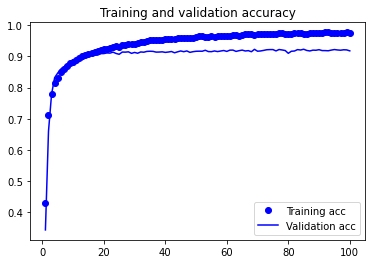

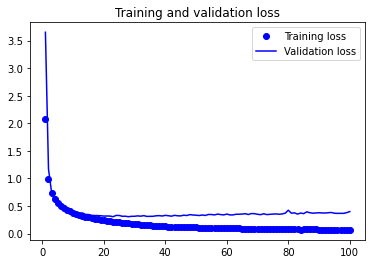

In [64]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Evaluate on Test Data

In [65]:
from sklearn.metrics import classification_report, confusion_matrix

In [66]:
model.evaluate(X_test, y_test)

304/304 [==============================] - 0s 1ms/step - loss: 0.4231 - acc: 0.9172


[0.42308804392814636, 0.9171902537345886]

In [70]:
label_map = {}

for idx, label in enumerate(label_mappings):
    label_map[idx] = label
label_map

{0: 'bed',
 1: 'bird',
 2: 'cat',
 3: 'dog',
 4: 'down',
 5: 'eight',
 6: 'five',
 7: 'four',
 8: 'go',
 9: 'happy',
 10: 'house',
 11: 'left',
 12: 'marvin',
 13: 'nine',
 14: 'no',
 15: 'off',
 16: 'on',
 17: 'one',
 18: 'right',
 19: 'seven',
 20: 'sheila',
 21: 'six',
 22: 'stop',
 23: 'three',
 24: 'tree',
 25: 'two',
 26: 'up',
 27: 'wow',
 28: 'yes',
 29: 'zero'}

In [71]:
y_predictions = model.predict(X_test)
y_pred_labels = [label_map[i] for i in y_predictions.argmax(axis=1)]
y_test_labels = [label_map[i] for i in y_test.argmax(axis=1)]

In [72]:
print(classification_report(y_pred_labels, y_test_labels))

              precision    recall  f1-score   support

         bed       0.89      0.91      0.90       253
        bird       0.85      0.98      0.91       226
         cat       0.94      0.96      0.95       255
         dog       0.90      0.93      0.92       253
        down       0.90      0.88      0.89       359
       eight       0.93      0.95      0.94       347
        five       0.86      0.90      0.88       341
        four       0.90      0.95      0.92       336
          go       0.85      0.85      0.85       355
       happy       0.96      0.97      0.96       259
       house       0.96      0.99      0.97       254
        left       0.96      0.91      0.94       374
      marvin       0.95      0.94      0.95       265
        nine       0.95      0.86      0.90       395
          no       0.90      0.84      0.87       382
         off       0.87      0.87      0.87       351
          on       0.89      0.88      0.89       356
         one       0.95    

<AxesSubplot:>

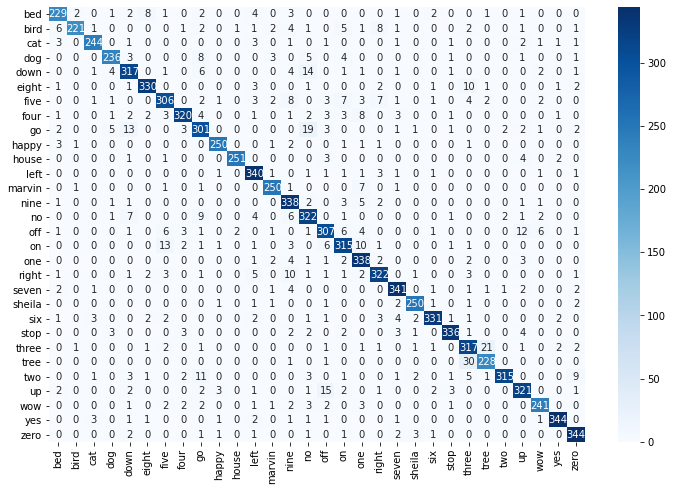

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

cm = pd.DataFrame(confusion_matrix(y_test_labels, y_pred_labels, labels=label_mappings))
cm.columns = label_mappings
cm.index = label_mappings
plt.figure(figsize=(12, 8))
sns.heatmap(cm, cmap="Blues", annot=True, fmt='d')